# Refit NMF for selected samples

In [1]:
import numpy as np
import sklearn
from nmf_with_missing_values import nmf_with_missing_values
import matplotlib.pyplot as plt
from utils import correlation_map_with_CCF

## load the data

In [2]:
tmp = np.load('../data/mouse_brain_ISH_float32.npz')
data = tmp['data']
sections = tmp['sections']
original_shape = data.shape
d = data.shape[1] * data.shape[2] * data.shape[3]
data = np.reshape(data, (data.shape[0], d))

## load the NMF result 

In [11]:
#f = np.load('../code/reza/nmf_result_ncomp_18.npz')
f = np.load('../data/stability_result_comp_18_0.npz')
PPs = f['A']
original_shape = f['original_shape']
X_guess = f['X_guess']
coefs = f['D']

## compute the entropy of coefs

In [4]:
normalized = coefs / np.sum(coefs, 1, keepdims=True)
entropy = np.sum(-(np.log(normalized + 1e-15)) / np.log(18) * normalized, 1)

## refit NMF

In [5]:
nmf = nmf_with_missing_values(n_outer_loops = 4, n_components = 18)
ratio = 0.1
refit_coefs = nmf.fit_transform(data[entropy < np.quantile(entropy, ratio), :])
refit_PPs = nmf.components_

## save results

In [8]:
np.savez('../data/nmf_refit_result_ncomp_'+str(refit_PPs.shape[0])+'_ratio_' + str(ratio) + '.npz', PPs = refit_PPs, 
         coefs = refit_coefs, X_guess = nmf.X_guess, data = data, original_shape = original_shape)

## reload results

In [6]:
f = np.load('../data/nmf_refit_result_ncomp_18_ratio_0.1.npz')
refit_coefs = f['coefs']
original_shape = f['original_shape']
X_guess = f['X_guess']
refit_PPs = f['PPs']

## compute the correlation with ABA CCF

- original

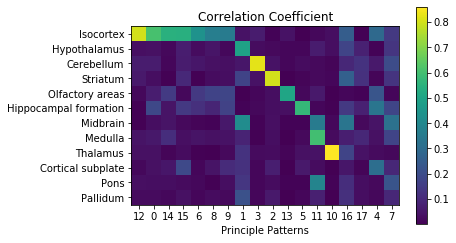

In [12]:
corr_mat = correlation_map_with_CCF(PPs, original_shape, order_type=2,area_order=[1,9,3,11,4,8,0,2,10,5,6,7], put_last_k=4)

- refit

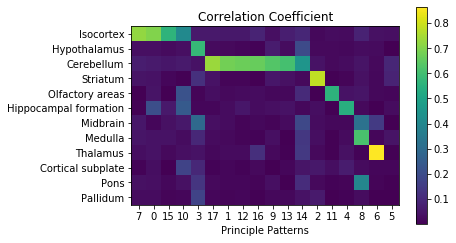

In [10]:
corr_mat = correlation_map_with_CCF(refit_PPs, original_shape, order_type=2,area_order=[1,9,3,11,4,8,0,2,10,5,6,7], put_last_k=1)